In [80]:
import pandas as pa
from math import log
from collections import OrderedDict

In [81]:
def ID3(data, label):
    rootNode = getRootNode(data, label)
    tree = (rootNode, getAttribute(data, label, rootNode))
    return tree

In [82]:
def getAttribute(data, label, rootNode):
    tree = {}
    unique_values = data[rootNode].unique()
    defaultData = data[label].value_counts().idxmax()
    tree.update({'default': defaultData})
    for unique_value in unique_values:
        df = data[data[rootNode] == unique_value]
        info = information(df[label])
        if info > 0:
            df = df.drop([rootNode], axis=1)
            aNode = getRootNode(df, label)
            tup = (aNode, getAttribute(df, label, aNode))
            tree.update({str(unique_value): tup})
        else:
            d = df.filter(items=[label, rootNode]).values[0]
            key = str(d[1])
            value = d[0]
            tree.update({key: value})
    return dict(OrderedDict(sorted(tree.items(), key=lambda d: d[0])))

In [83]:
def getRootNode(data, label):
    gainDict = dict()
    info = information(data[label])
    if info > 0:
        for key in data.keys():
            if key != label:
                df = data.filter(items=[label, key])
                gainDict.update({key: gain(df, key, label, info)})
    root = max(gainDict.keys(), key=(lambda x: gainDict[x]))
    return root

In [84]:
def gain(data, key, label, I_total):
    data = pa.DataFrame(data=data)
    entropy_total = 0.0
    unique_values = data[key].unique()
    for value in unique_values:
        df = data[data[key] == value]
        info_value = information(df[label])
        entropy_value = entropy(s=len(df), s_total=len(data), info=info_value)
        entropy_total += entropy_value
    return float(format((I_total - entropy_total), '.5f'))

In [85]:
def entropy(s, s_total, info):
    s = abs(s)
    s_total = abs(s_total)
    if s != 0 and s_total != 0:
        result = (s / s_total) * info
    else:
        result = 0
    return float(format(result, '.5f'))

In [86]:
def information(data):
    info = 0.0
    uniqueValues = data.value_counts()
    for count in uniqueValues:
        p = probability(count, len(data))
        if p != 0:
            temp1 = p * (log(p, 2))
        else:
            temp1 = 0
        info -= temp1
    return float(format(info, '.5f'))

In [87]:
def probability(s1, s):
    s1 = abs(s1)
    s = abs(s)
    if s1 != 0 and s != 0:
        result = s1 / s
    else:
        result = 0
    return float(format(result, '.5f'))

In [88]:
def dataPreprocesing(data, label):
    dicList = list()
    for row in data:
        temp = {label: bool(row[1])}
        row[0].update(temp)
        dicList.append(row[0])
    dataFrame = pa.DataFrame(data=dicList)
    return dataFrame


In [89]:
def readDataset(filename):
    dataframe = pa.read_table(filename, sep=',')
    return dataframe

In [90]:
def classify(data, input):
    if isinstance(data, tuple):
        if data[0] in input:
            attribute_data = input[data[0]]
            if attribute_data in data[1]:
                value = data[1].get(attribute_data)
                result = classify(value, input)
            else:
                value = data[1].get('default')
                result = classify(value, input)
        else:
            value = data[1].get('default')
            result = classify(value, input)
    else:
        result = data
    return result

In [91]:
training_data = [
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, False)
]

label = 'hire'
dataFrame = dataPreprocesing(training_data, label)
dt = ID3(dataFrame, label)

print('Decision tree : \n', dt, '\n')
c1 = {"level": "Junior", "lang": "Java", "tweets": "yes", "phd": "no"}
c2 = {"level": "Junior", "lang": "Java", "tweets": "yes", "phd": "yes"}
c3 = {"level": "Intern"}
c4 = {"level": "Senior"}
print("Classify1 = ", c1, '\n')
print("Classify1 Result = ", classify(dt, c1), '\n')
print("Classify2 = ", c2, '\n')
print("Classify2 Result = ", classify(dt, c2), '\n')
print("Classify3 = ", c3, '\n')
print("Classify3 Result = ", classify(dt, c3), '\n')
print("Classify4 = ", c4, '\n')
print("Classify4 Result = ", classify(dt, c4), '\n\n')

Decision tree : 
 ('level', {'Junior': ('phd', {'default': True, 'no': True, 'yes': False}), 'Mid': True, 'Senior': ('tweets', {'default': False, 'no': False, 'yes': True}), 'default': True}) 

Classify1 =  {'level': 'Junior', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'} 

Classify1 Result =  True 

Classify2 =  {'level': 'Junior', 'lang': 'Java', 'tweets': 'yes', 'phd': 'yes'} 

Classify2 Result =  False 

Classify3 =  {'level': 'Intern'} 

Classify3 Result =  True 

Classify4 =  {'level': 'Senior'} 

Classify4 Result =  False 




# Qualitative_Bankruptcy Data Set 

http://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy

Abstract: Predict the Bankruptcy from Qualitative parameters from experts.

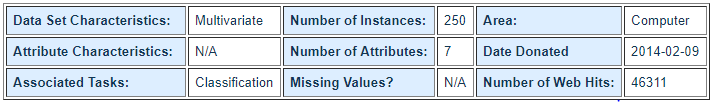

Source Information
-- Creator : Mr.A.Martin(jayamartin '@' yahoo.com) Mr.J.Uthayakumar (uthayakumar17691 '@' gmail.com) Mr.M.Nadarajan(nadaraj.muthuvel '@' gmail.com)
-- Guided By : Dr.V.Prasanna Venkatesan
-- Institution : Sri Manakula Vinayagar Engineering College and Pondicherry University
-- Country : India
-- Date : February 2014

In [92]:

data = readDataset('.\\dataset\\Qualitative_Bankruptcy.csv')
label = 'Result'
trainingData = data.sample(frac=0.7)
testData = data.loc[~data.index.isin(trainingData.index)]
testData = testData.drop([label], axis=1)
dt = ID3(trainingData, label)

print('Decision tree : \n', dt, '\n')

for input in testData.iterrows():
    temp = input[1].to_dict()
    print("Classify",input[0], " = ", temp, '\n')
    print("Classify Result = ", classify(dt, temp), '\n\n')

c1 = {'Industrial_Risk': 'N', 'Management_Risk': 'N', 'Credibility': 'N', 'Competitiveness': 'N', 'Operating_Risk': 'N'}
c2 = {'Industrial_Risk': 'P', 'Management_Risk': 'P', 'Financial_Flexibility': 'A', 'Credibility': 'A', 'Operating_Risk': 'P'}
c3 = {'Competitiveness': 'A','Financial_Flexibility': 'B'}
c4 = {'Competitiveness': 'N'}
c5 = {'Credibility': 'N'}

print("Classify1 = ", c1, '\n')
print("Classify1 Result = ", classify(dt, c1), '\n')
print("Classify2 = ", c2, '\n')
print("Classify2 Result = ", classify(dt, c2), '\n')
print("Classify3 = ", c3, '\n')
print("Classify3 Result = ", classify(dt, c3), '\n')
print("Classify4 = ", c4, '\n')
print("Classify4 Result = ", classify(dt, c4), '\n')
print("Classify5 = ", c5, '\n')
print("Classify4 Result = ", classify(dt, c5), '\n\n')

Decision tree : 
 ('Competitiveness', {'A': ('Credibility', {'A': 'NB', 'N': ('Financial_Flexibility', {'A': 'NB', 'N': 'B', 'default': 'B'}), 'P': 'NB', 'default': 'NB'}), 'N': 'B', 'P': 'NB', 'default': 'NB'}) 

Classify 0  =  {'Industrial_Risk': 'P', 'Management_Risk': 'P', 'Financial_Flexibility': 'A', 'Credibility': 'A', 'Competitiveness': 'A', 'Operating_Risk': 'P'} 

Classify Result =  NB 


Classify 1  =  {'Industrial_Risk': 'N', 'Management_Risk': 'N', 'Financial_Flexibility': 'A', 'Credibility': 'A', 'Competitiveness': 'A', 'Operating_Risk': 'N'} 

Classify Result =  NB 


Classify 2  =  {'Industrial_Risk': 'A', 'Management_Risk': 'A', 'Financial_Flexibility': 'A', 'Credibility': 'A', 'Competitiveness': 'A', 'Operating_Risk': 'A'} 

Classify Result =  NB 


Classify 9  =  {'Industrial_Risk': 'P', 'Management_Risk': 'P', 'Financial_Flexibility': 'A', 'Credibility': 'A', 'Competitiveness': 'P', 'Operating_Risk': 'P'} 

Classify Result =  NB 


Classify 13  =  {'Industrial_Risk'

Classify Result =  B 


Classify 233  =  {'Industrial_Risk': 'N', 'Management_Risk': 'N', 'Financial_Flexibility': 'N', 'Credibility': 'N', 'Competitiveness': 'N', 'Operating_Risk': 'N'} 

Classify Result =  B 


Classify 235  =  {'Industrial_Risk': 'A', 'Management_Risk': 'N', 'Financial_Flexibility': 'N', 'Credibility': 'N', 'Competitiveness': 'N', 'Operating_Risk': 'A'} 

Classify Result =  B 


Classify 237  =  {'Industrial_Risk': 'N', 'Management_Risk': 'P', 'Financial_Flexibility': 'N', 'Credibility': 'N', 'Competitiveness': 'N', 'Operating_Risk': 'N'} 

Classify Result =  B 


Classify 240  =  {'Industrial_Risk': 'N', 'Management_Risk': 'N', 'Financial_Flexibility': 'N', 'Credibility': 'A', 'Competitiveness': 'N', 'Operating_Risk': 'A'} 

Classify Result =  B 


Classify 245  =  {'Industrial_Risk': 'N', 'Management_Risk': 'N', 'Financial_Flexibility': 'A', 'Credibility': 'N', 'Competitiveness': 'N', 'Operating_Risk': 'N'} 

Classify Result =  B 


Classify 247  =  {'Industrial_R